In [ ]:
import numpy
import skimage.data, skimage.color, skimage.io
import matplotlib.pyplot as plt


Task 1:
><br>Print the shape of the greyscale image

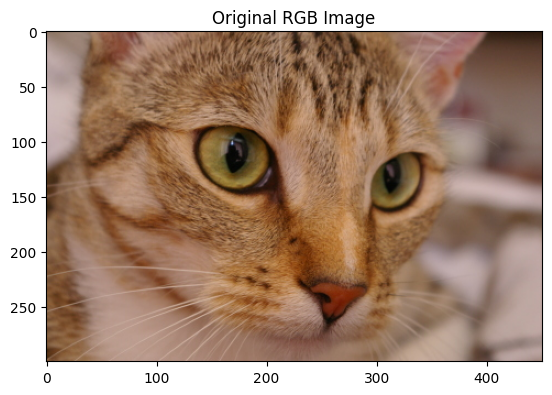

Original image shape: (300, 451, 3)


In [ ]:
img = skimage.data.chelsea()
plt.imshow(img)
plt.title("Original RGB Image")
plt.show()

print("Original image shape:", img.shape)


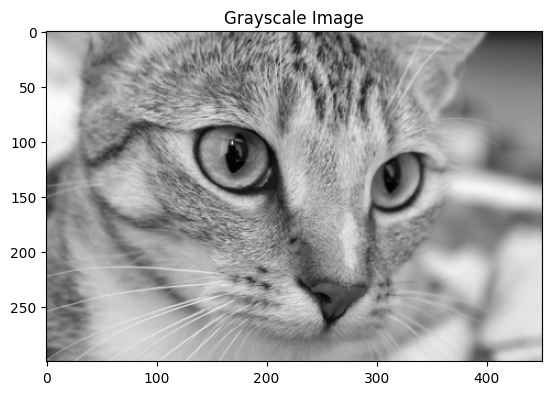

Grayscale image shape: (300, 451)


In [ ]:
img = skimage.color.rgb2gray(img)
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.show()

print("Grayscale image shape:", img.shape)


Ans: Task 1

The original color image shape is (300, 451, 3), and the grayscale image shape is (300, 451).

For cross-reference:
print(img.shape) before conversion  shows the RGB shape
print(img.shape) after the 'skimage. color.rgb2gray(img)' shows the grayscale change of the original image




In [ ]:
print(img[0:3, 0:3])

[[0.48523098 0.48523098 0.47738784]
 [0.49699569 0.49307412 0.48523098]
 [0.50849255 0.50457098 0.49475569]]


In [ ]:
import numpy
l1_filter = numpy.zeros((2,3,3)) #we create a 3x3 array (multi-dim) with default 0 vals

In [ ]:
print(l1_filter)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


Task 2:
><br> Explain what these values are assigning to the l1_filter variable

>l1_filter[0, :, :] = numpy.array([[[-1,0,1] , <br>
                                 [-1,0,1] , <br>
                                 [-1,0,1]]])<br><br>
l1_filter[1, :, :] = numpy.array([[[-1,0,1] ,<br>
                                 [-1,0,1] , <br>
                                 [-1,0,1]]])<br><br>


          

Ans:
What it does is basically the l1_filter[0, :, :] = numpy.array([[[-1,0,1], [-1,0,1], [-1,0,1]]]) assigns a 3x3 matrix of values [[-1,0,1], [-1,0,1], [-1,0,1]] to the first "slice" of the l1_filter array along the first dimension (index 0).

Then

l1_filter[1, :, :] = numpy.array([[[-1,0,1], [-1,0,1], [-1,0,1]]]) assigns the same 3x3 matrix to the second "slice" of the l1_filter array along the first dimension (index 1).

In the context of image processing and convolutions, these 3x3 matrices are often referred to as "filters" or "kernels." These specific values [[-1,0,1], [-1,0,1], [-1,0,1]] are commonly used as a filter to detect vertical edges in an image. By applying this filter across the image, the convolution operation highlights areas where there are sharp changes in pixel intensity in the vertical direction.

In [ ]:
# first filter: vertical edge detector
l1_filter[0,:,:] = numpy.array([[[-1, 0, 1],
                                 [-1, 0, 1],
                                 [-1, 0, 1]]])

# second filter: horizontal edge detector (CHANGED FOR TASK 5)
l1_filter[1,:,:] = numpy.array([[[ 1,  1,  1],
                                 [ 0,  0,  0],
                                 [-1, -1, -1]]])

# manually assigning filters to our default array vals


In [ ]:
print(l1_filter[0])

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


In [ ]:
print(l1_filter)

[[[-1.  0.  1.]
  [-1.  0.  1.]
  [-1.  0.  1.]]

 [[ 1.  1.  1.]
  [ 0.  0.  0.]
  [-1. -1. -1.]]]


Task 3: Write the values of each variable:

>1. filter_size
2. img.shape
3. l1_filter.shape
4. result.shape (from conv_ function)

Ans:

img.shape: (300, 451)

l1_filter.shape: (2, 3, 3)

Filter 1

filter_size: 3

result.shape: (300, 451)

Filter 2

filter_size: 3

result.shape: (300, 451)

In [ ]:
###########################################################################################
# SECOND AND MAIN PART OF CONVOLUTION PROCESS - CALCULATES MATRIX MULTIPLICATION AND SUMMATION OF FILTER AND IMAGE REGION
###########################################################################################

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in numpy.uint16(numpy.arange(filter_size/2.0, img.shape[0]-filter_size/2.0+1)): # this is the general row range (float for centering) -- basically, go along these rows with steps the size of filter until you're 1 filter-size away from the edge of the image
        for c in numpy.uint16(numpy.arange(filter_size/2.0, img.shape[1]-filter_size/2.0+1)): # this is the general column range
            """
            Getting the current region to get multiplied with the filter.
            How to loop through the image and get the region based on
            the image and filer sizes is the most tricky part of convolution.
            """
            curr_region = img[r-numpy.uint16(numpy.floor(filter_size/2.0)):r+numpy.uint16(numpy.ceil(filter_size/2.0)),
                              c-numpy.uint16(numpy.floor(filter_size/2.0)):c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.

    #Clipping the outliers of the result matrix.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0),
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result

###########################################################################################
# FIRST PART OF CONVOLUTION PROCESS - HANDLES VALIDATION & LOOPS BASED ON FILTER AND IMAGE SHAPE
###########################################################################################


def conv(img, conv_filter):
###########################################################################################
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth. The number of elements in each shape array
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal. That filter is a square shape
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd. No remainders when modulus
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        sys.exit()
###########################################################################################
# An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1, # first shape value
                                img.shape[1]-conv_filter.shape[1]+1, # second shape value
                                conv_filter.shape[0]))# Convolving the image by the filter(s).
#############################################################################################
    for filter_num in range(conv_filter.shape[0]): #cycles through however many filters are in conv_filter param/input
        print("Filter ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num],
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter) #calls the previous func

        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.


    return feature_maps # Returning all feature maps. Multiple feature maps based on filter number

Task 4:

>Explain why we need to trim the result array in the conv_ function before sharing the final results array

ANS:

The result array is trimmed because the convolution operation cannot be fully applied at the image borders. When centering a filter at edge pixels, parts of the filter extend beyond the image boundaries. The trimming removes these border pixels where full convolution wasn't possible, ensuring the output only contains valid convolution results.

In [ ]:
def relu(feature_map):
    #Preparing the output of the ReLU activation function.
    relu_out = numpy.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in numpy.arange(0,feature_map.shape[0]):
            for c in numpy.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = numpy.max(feature_map[r, c, map_num], 0)
    return relu_out

In [ ]:
def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride),
                            numpy.uint16((feature_map.shape[1]-size+1)/stride),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in numpy.arange(0,feature_map.shape[0]-size-1, stride):
            c2 = 0
            for c in numpy.arange(0, feature_map.shape[1]-size-1, stride):
                pool_out[r2, c2, map_num] = numpy.max(feature_map[r:r+size, c:c+size])
                # pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride),
                #             numpy.uint16((feature_map.shape[1]-size+1)/stride),
                #             feature_map.shape[-1]))
                # pool_out[r2, c2, map_num] = numpy.max(feature_map[r:r+size, c:c+size])
                c2 = c2 + 1
            r2 = r2 +1

    return pool_out


##Process (in each Layer):

###Step 1:
Inputs: image, filter(s) <br>
Process: Multiplication and Addition via convolution function<br>
Output: Feature Map


###Step 2:
Inputs: Feature Map <br>
Process: Removing negative numbers via ReLU Activation Function<br>
Output: Feature Map with positive integers


###Step 3:
Inputs: Feature Map with positive integers, Region area, Stride size <br>
Process: Get maximum pixel value in the area via Max Pooling Function<br>
Output: Feature Map with positive integers


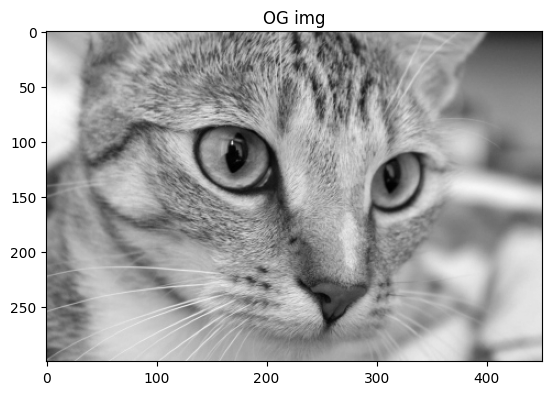

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.title("OG img")

plt.show()

Task 5: <br>
> Change the values of your SECOND filter. <br>
Display the resulting FEATURE MAP at each step of the process for your SECOND filter

In [ ]:
l1_feature_map = conv(img, l1_filter)

Filter  1
Filter  2


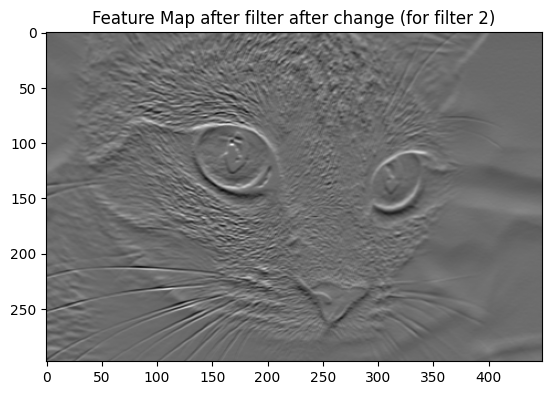

In [ ]:
plt.imshow(l1_feature_map[:,:,1], cmap='gray')
plt.title("Feature Map after filter after change (for filter 2)")

plt.show()



In [ ]:
print(l1_feature_map[6:9, 6:9])

[[[-0.02437765 -0.05098039]
  [-0.01653451 -0.05490196]
  [-0.01765843 -0.05295255]]

 [[-0.02466039 -0.05631569]
  [-0.02073882 -0.05211137]
  [-0.01960784 -0.04398549]]

 [[-0.01821608 -0.07593059]
  [-0.02605922 -0.0706102 ]
  [-0.03193804 -0.06864588]]]


In [ ]:
l1_feature_map_relu = relu(l1_feature_map)
print (l1_feature_map_relu[6:9, 6:9])

[[[-0.02437765 -0.05098039]
  [-0.01653451 -0.05490196]
  [-0.01765843 -0.05295255]]

 [[-0.02466039 -0.05631569]
  [-0.02073882 -0.05211137]
  [-0.01960784 -0.04398549]]

 [[-0.01821608 -0.07593059]
  [-0.02605922 -0.0706102 ]
  [-0.03193804 -0.06864588]]]


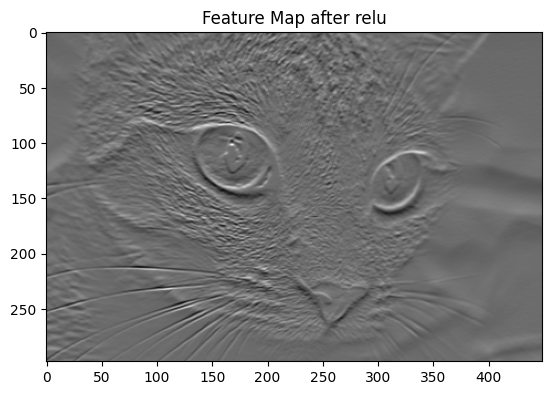

In [ ]:
plt.imshow(l1_feature_map_relu[:,:,1], cmap='gray')
plt.title("Feature Map after relu")

plt.show()



In [ ]:
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
print(l1_feature_map_relu_pool[6:9, 6:9])

[[[-0.01960784 -0.01960784]
  [-0.01960784 -0.01960784]
  [-0.01960784 -0.01960784]]

 [[-0.01960784 -0.01960784]
  [-0.02041843 -0.02041843]
  [-0.02664039 -0.02664039]]

 [[-0.02580706 -0.02580706]
  [-0.02654941 -0.02654941]
  [-0.01993608 -0.01993608]]]


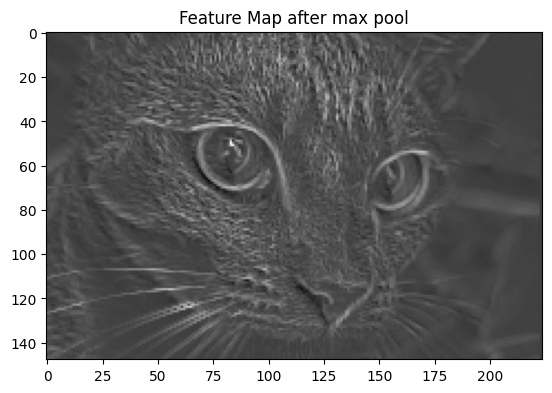

In [ ]:
plt.imshow(l1_feature_map_relu_pool[:,:,1], cmap='gray')
plt.title("Feature Map after max pool")

plt.show()



Task 6: <br>
1. What is the shape of the filters in layers 2 and 3 respectively?
2. Howmany filters are applied at each stage?
3. What is the final shape of the output after all the layers?

In [ ]:
# Second conv layer
l2_filter = numpy.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
print("\n**ReLU**")
l2_feature_map_relu = relu(l2_feature_map)
print("\n**Pooling**")
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)
print("**End of conv layer 2**\n")


**Working with conv layer 2**
Filter  1
Filter  2
Filter  3

**ReLU**

**Pooling**
**End of conv layer 2**



In [ ]:
# Third conv layer
l3_filter = numpy.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 3**")
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
print("\n**ReLU**")
l3_feature_map_relu = relu(l3_feature_map)
print("\n**Pooling**")
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)
print("**End of conv layer 3**\n")


**Working with conv layer 3**
Filter  1

**ReLU**

**Pooling**
**End of conv layer 3**



In [ ]:
print(l3_feature_map_relu_pool.shape)

(32, 51, 1)


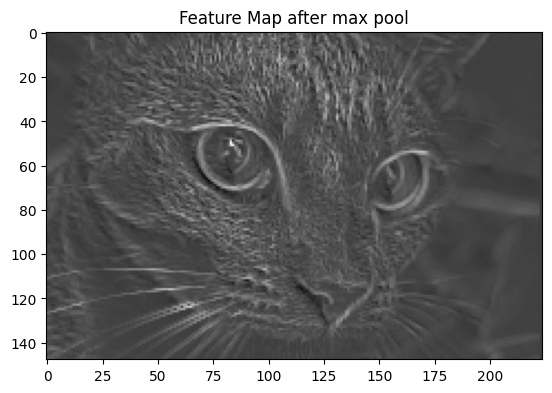

In [ ]:
plt.imshow(l1_feature_map_relu_pool[:,:,1], cmap='gray')
plt.title("Feature Map after max pool")

plt.show()


## 1. Layer 2 (3, 5, 5, 2), Layer 3 (1, 7, 7, 3)
## 2. Layer 1 has 2 filters, Layer 2 has 3 filters, Layer 3 has 1 filter
## 3. (32, 51, 1)